## Imorting libraries

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [2]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [3]:
dataset_path = 'Cats_Dogs'
image_paths = [os.path.join(dataset_path, fname) for fname in os.listdir(dataset_path)]
fnames=os.listdir(dataset_path)

In [4]:
len(fnames)

23001

In [5]:
for i in range(23000):
    print(fnames[i])

cat.0.jpg
cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg
cat.10009.jpg
cat.10010.jpg
cat.10011.jpg
cat.10012.jpg
cat.10013.jpg
cat.10014.jpg
cat.10015.jpg
cat.10017.jpg
cat.10018.jpg
cat.10019.jpg
cat.1002.jpg
cat.10020.jpg
cat.10021.jpg
cat.10022.jpg
cat.10023.jpg
cat.10024.jpg
cat.10025.jpg
cat.10027.jpg
cat.10028.jpg
cat.10029.jpg
cat.1003.jpg
cat.10030.jpg
cat.10031.jpg
cat.10032.jpg
cat.10033.jpg
cat.10034.jpg
cat.10035.jpg
cat.10036.jpg
cat.10037.jpg
cat.10038.jpg
cat.10039.jpg
cat.1004.jpg
cat.10040.jpg
cat.10041.jpg
cat.10042.jpg
cat.10043.jpg
cat.10044.jpg
cat.10045.jpg
cat.10046.jpg
cat.10047.jpg
cat.10049.jpg
cat.1005.jpg
cat.10051.jpg
cat.10052.jpg
cat.10053.jpg
cat.10054.jpg
cat.10055.jpg
cat.10056.jpg
cat.10057.jpg
cat.10058.jpg
cat.10059.jpg
cat.1006.jpg
cat.10060.jpg
cat.10061.jpg
cat.10062.jpg
cat.10063.jpg
cat.10065.jpg
cat.10066.jpg
cat.10067.j

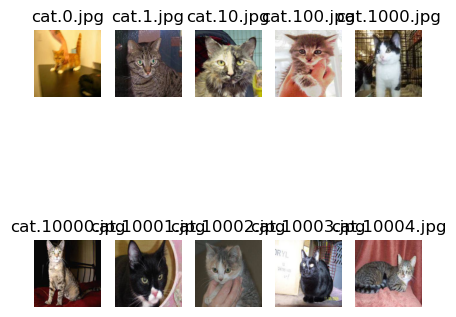

In [6]:
fig,axs=plt.subplots(nrows=2,ncols=5,figsize=(5,5))
axs=axs.flatten()
for i in range(10):
    filepath=os.path.join(dataset_path,fnames[i])
    img=Image.open(filepath)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(fnames[i])
plt.show()

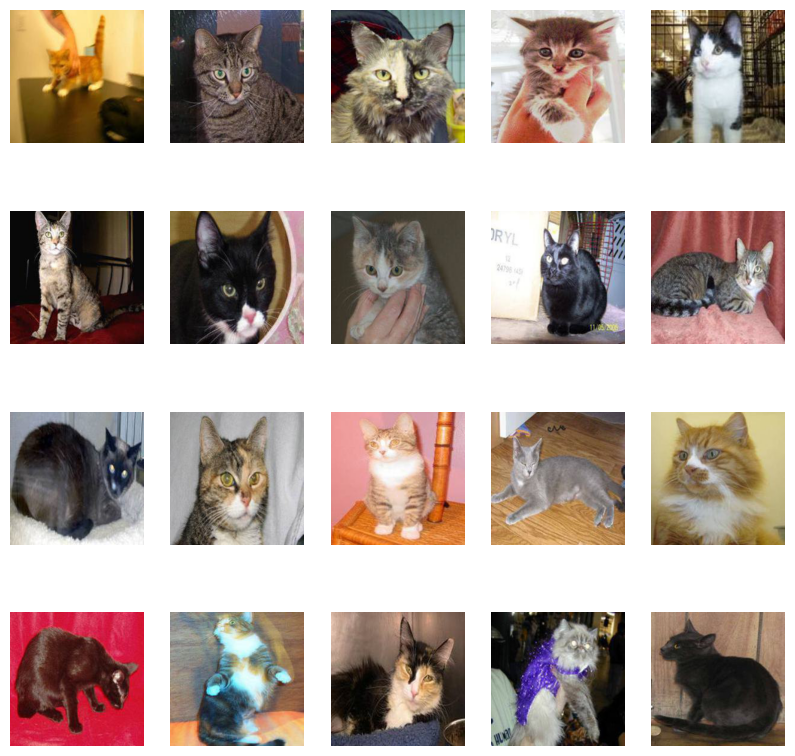

In [7]:
fig,axs=plt.subplots(nrows=4,ncols=5,figsize=(10,10))
axs=axs.flatten()
for i in range(20):
    filepath=os.path.join(dataset_path,fnames[i])
    img=Image.open(filepath)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

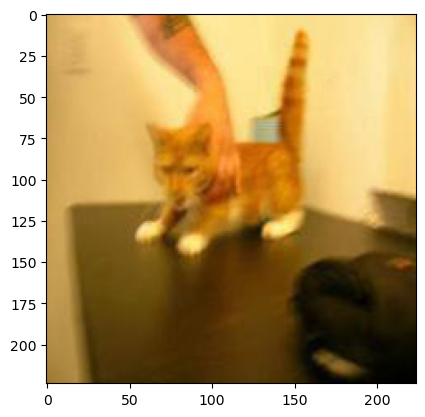

In [8]:
# display cat image
img = mpimg.imread('Cats_Dogs\\cat.0.jpg')
imgplt = plt.imshow(img)
plt.show()

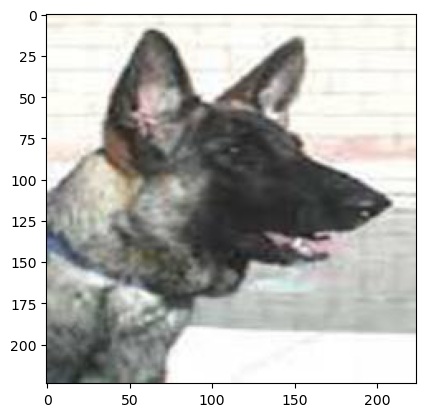

In [9]:
# display dog image
img = mpimg.imread('Cats_Dogs\\dog.9999.jpg')
imgplt = plt.imshow(img)
plt.show()

In [10]:
file_names = os.listdir('Cats_Dogs')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 11500
Number of cat images = 11501


## Resizing all the images

In [11]:
#creating a directory for resized images
fnames=os.listdir(dataset_path)
for file in fnames:
    dataset_path_img=dataset_path+"/"+file
    img=Image.open(dataset_path_img)
    img=img.resize((224,224))
    img.save(dataset_path_img)

PermissionError: [Errno 13] Permission denied: 'Cats_Dogs/image resized'

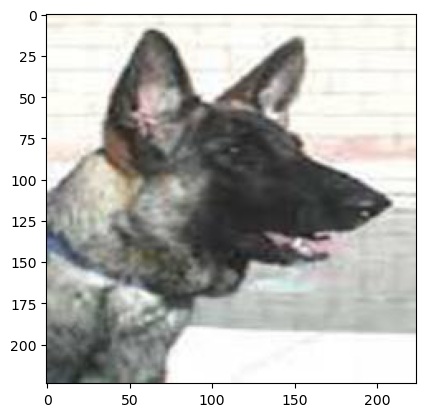

In [12]:
# display dog image
img = mpimg.imread('Cats_Dogs\\dog.9999.jpg')
imgplt = plt.imshow(img)
plt.show()

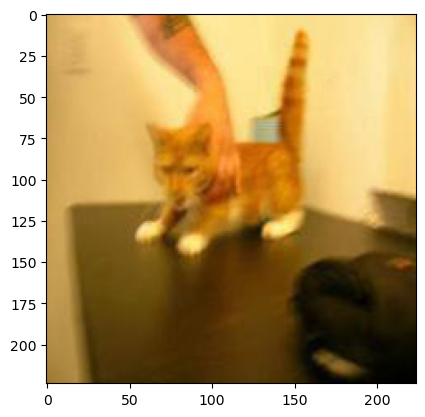

In [13]:
# display cat image
img = mpimg.imread('Cats_Dogs\\cat.0.jpg')
imgplt = plt.imshow(img)
plt.show()

## Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [14]:
# creaing a for loop to assign labels
filenames = os.listdir('Cats_Dogs')


labels = []

for i in range(23000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [15]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
23001


In [16]:
print(labels[0:23000])
print(len(labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [17]:
# counting the images of dogs and cats out of 30000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[11500 11500]


## Converting all the resized images to numpy arrays

In [18]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import cv2
import glob

In [20]:
# Directory containing your images
image_folder = 'Cats_Dogs'

# List to store all the image arrays
image_arrays = []

for filename in os.listdir(image_folder):
    if filename.endswith('.jpg'):
        # Load the image
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)
        
        # Convert the resized image to a NumPy array
        image_array = np.array(image)
        
        # Append the array to the list
        image_arrays.append(image_array)

# Convert the list of arrays to a NumPy array
image_arrays = np.array(image_arrays)

print(image_arrays.shape)  # Optional: Check the shape of the resulting array


(23000, 224, 224, 3)


In [21]:
print(image_arrays)

[[[[ 87 165 202]
   [ 89 167 204]
   [ 92 169 208]
   ...
   [126 204 241]
   [126 201 240]
   [126 201 240]]

  [[ 87 165 202]
   [ 89 167 204]
   [ 92 169 208]
   ...
   [126 204 241]
   [127 202 241]
   [126 201 240]]

  [[ 87 165 202]
   [ 89 167 204]
   [ 92 169 208]
   ...
   [127 205 242]
   [127 202 240]
   [127 202 240]]

  ...

  [[ 51 122 159]
   [ 52 123 160]
   [ 53 124 161]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 49 120 157]
   [ 50 121 158]
   [ 51 122 159]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[ 47 118 155]
   [ 48 119 156]
   [ 49 120 157]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [185 205 206]
   [174 197 199]
   [169 194 198]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [182 202 203]
   [173 195 200]
   [170 195 199]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [176 196 197]
   [168 193 197]
   [169 195

In [22]:
X = image_arrays
y = np.asarray(labels)

In [23]:
y

array([0, 0, 0, ..., 1, 1, 1])

## Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(23000, 224, 224, 3) (18400, 224, 224, 3) (4600, 224, 224, 3)


In [41]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

MemoryError: Unable to allocate 20.6 GiB for an array with shape (18400, 224, 224, 3) and data type float64

In [ ]:
## Installing the CNN
classifier= Sequential()


In [ ]:
classifier.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
score, acc = classifier.evaluate(X_test,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

## New

In [24]:
## Installing the CNN
classifier= Sequential()

## step-1 (Convolution)
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add( MaxPooling2D(pool_size=(2,2)))

## Adding a second convolution layer
classifier.add(Conv2D(32,(3,3),activation='relu'))
classifier.add( MaxPooling2D(pool_size=(2,2)))

C:\Users\Windows\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
## step 3 -Flattening
classifier.add(Flatten())

## step 4-Full Connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units= 1, activation='sigmoid'))

In [26]:
## Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
## part-2 - Fitting the CNN to images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(X_train,target_size=(64, 64), batch_size=32, class_mode='binary')


MemoryError: 

In [43]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(X_test, target_size=(64, 64), batch_size=32, class_mode='binary')

ValueError: listdir: embedded null character in path

In [34]:
classifier.fit(X_train,y_train,
                         steps_per_epoch=4000,
                         epochs=10,       
                         validation_steps=10)

MemoryError: Unable to allocate 2.58 GiB for an array with shape (18400, 224, 224, 3) and data type uint8